<a href="https://colab.research.google.com/github/Tonyosa/sales-prediction2/blob/main/beltexamipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *George Osadchenko* 
Belt Exam 1

10/07/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Mod_auto-insurance-complaint-rankings - Temp auto-insurance-complaint-rankings.csv")
df.head()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


Loading all the data and checking for duplicates and missing values.

In [3]:
df.dtypes

Unnamed: 0                          int64
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints        object
Not Upheld Complaints               int64
Total Complaints                   object
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                         int64
dtype: object

In [4]:
df.info


<bound method DataFrame.info of       Unnamed: 0   NAIC                             Company Name     Ratio  \
0              0  32786  Progressive Specialty Insurance Company    0.0000   
1              1  19976           Amica Mutual Insurance Company    0.0000   
2              2  25453  Nationwide Insurance Company of America    0.0000   
3              3  15024       Preferred Mutual Insurance Company    0.0000   
4              4  10052         Chubb National Insurance Company    0.0000   
...          ...    ...                                      ...       ...   
1358        1353  22667           ACE American Insurance Company   12.5881   
1359        1354  23809          Granite State Insurance Company   14.2471   
1360        1355  10982            Long Island Insurance Company   25.8860   
1361        1356  16535        Zurich American Insurance Company   36.5845   
1362        1357  42889         Victoria Fire & Casualty Company  152.9403   

      Upheld Complaints Questio

In [5]:
print(len(df.columns))

11


In [6]:
print(len(df))

1363


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1363 non-null   int64  
 1   NAIC                            1363 non-null   int64  
 2   Company Name                    1363 non-null   object 
 3   Ratio                           1363 non-null   float64
 4   Upheld Complaints               1358 non-null   float64
 5   Question of Fact Complaints     1363 non-null   object 
 6   Not Upheld Complaints           1363 non-null   int64  
 7   Total Complaints                1363 non-null   object 
 8   Premiums Written (in Millions)  1363 non-null   float64
 9   Rank                            1363 non-null   int64  
 10  Filing Year                     1363 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 117.3+ KB


In [8]:
df.isna().any()

Unnamed: 0                        False
NAIC                              False
Company Name                      False
Ratio                             False
Upheld Complaints                  True
Question of Fact Complaints       False
Not Upheld Complaints             False
Total Complaints                  False
Premiums Written (in Millions)    False
Rank                              False
Filing Year                       False
dtype: bool

In [9]:
df.isnull().sum()

Unnamed: 0                        0
NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 5
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

In [10]:
df.isnull().sum().sum()

5

After finding all the incorrect data I drop duplicates.

In [11]:
df2 = df.drop_duplicates().sum()
df

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0000,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0000,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0000,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0000,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0000,0.0,1,2,3,46.735,5,2016
...,...,...,...,...,...,...,...,...,...,...,...
1358,1353,22667,ACE American Insurance Company,12.5881,1.0,0,3,4,0.079,177,2009
1359,1354,23809,Granite State Insurance Company,14.2471,1.0,0,0,1,0.070,178,2009
1360,1355,10982,Long Island Insurance Company,25.8860,265.0,17,73,355,10.237,179,2009
1361,1356,16535,Zurich American Insurance Company,36.5845,1.0,0,1,2,0.027,180,2009


In [12]:
df.dropna(inplace=True)

Here I chose to drop all of the missing values.

In [13]:
df.isna().sum()

Unnamed: 0                        0
NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

In [14]:
print(df.isnull().sum())

Unnamed: 0                        0
NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64


In [15]:
print(df.isnull().sum().sum())

0


In [16]:
df

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0000,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0000,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0000,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0000,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0000,0.0,1,2,3,46.735,5,2016
...,...,...,...,...,...,...,...,...,...,...,...
1358,1353,22667,ACE American Insurance Company,12.5881,1.0,0,3,4,0.079,177,2009
1359,1354,23809,Granite State Insurance Company,14.2471,1.0,0,0,1,0.070,178,2009
1360,1355,10982,Long Island Insurance Company,25.8860,265.0,17,73,355,10.237,179,2009
1361,1356,16535,Zurich American Insurance Company,36.5845,1.0,0,1,2,0.027,180,2009


Now the data is clear of any duplicates i am now going to check all of the data types

In [17]:
df.dtypes

Unnamed: 0                          int64
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints        object
Not Upheld Complaints               int64
Total Complaints                   object
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                         int64
dtype: object

In [19]:
df["Question of Fact Complaints"] = df["Question of Fact Complaints"].replace('46_', 46)

In [20]:
df['Question of Fact Complaints'].astype('int')

0       17
1        9
2        9
3        3
4        1
        ..
1358     0
1359     0
1360    17
1361     0
1362     1
Name: Question of Fact Complaints, Length: 1358, dtype: int64

In [21]:
df.dtypes

Unnamed: 0                          int64
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints        object
Not Upheld Complaints               int64
Total Complaints                   object
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                         int64
dtype: object

In [26]:
df["Total Complaints"] = df["Total Complaints"].replace('Fifteen', 15)

In [27]:
df['Total Complaints'].astype('int')

0        46
1        17
2        13
3         5
4         3
       ... 
1358      4
1359      1
1360    355
1361      2
1362      3
Name: Total Complaints, Length: 1358, dtype: int64

In [28]:
df.dtypes

Unnamed: 0                          int64
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints        object
Not Upheld Complaints               int64
Total Complaints                   object
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                         int64
dtype: object

After checking all the data types and correcting the incorrect data, Now I will graph the data.

Here i am ploting Premiums Written (in Millions) to see how it looks like in a matplot

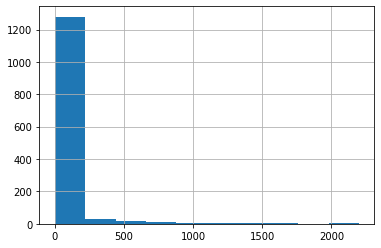

In [29]:
df['Premiums Written (in Millions)'].hist()

Here i am ploting Ratio to see how it looks like in a matplot

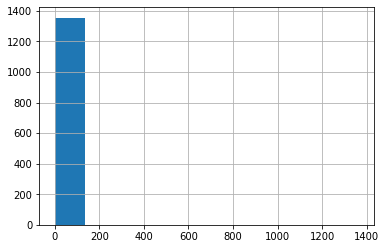

In [31]:
df['Ratio'].hist()

Here i am ploting filling year with rank to see how it looks like in a box plot

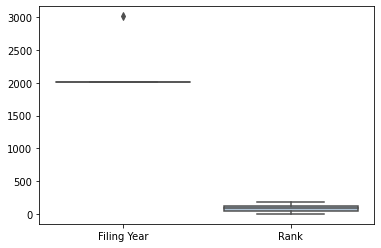

In [34]:
sns.boxplot(data=df.loc[:, ['Filing Year', 'Rank']], palette = 'BuPu_r')

Here i am ploting not upheld complaints with NAIC to see how it looks like in a box plot

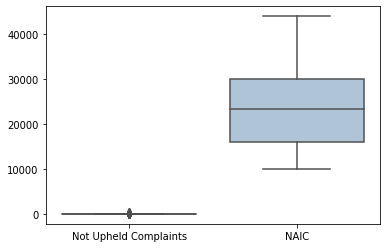

In [35]:
sns.boxplot(data=df.loc[:, ['Not Upheld Complaints', 'NAIC']], palette = 'BuPu_r')